<b style="color:red">Run the cell below for a nicer layout</b>

In [1]:
from fds import *

<b>This notebook requires matplotlib >= v3.4.1</b>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h1>Shark attacks!</h1>

You have already worked extensively with the shark attack dataset. This version has a few additional columns: 

<ul>
    <li><tt>Area</tt> contains a more precise description of where the incident occurred,
    <li><tt>Type</tt> a broad description of why it happened (importantly, whether the attack was provoked or not), 
    <li><tt>Injury</tt> describes the severity of the 
        injury sustained by the victim (if available),
    <li><tt>Species</tt> the shark species involved in the attack (insofar it is known),
    <li>and finally <tt>Size (min)</tt> / <tt>Size (max)</tt> an estimate of the shark's size in cm. The `min` and `max` stem from the fact that the original dataset has a rough description of the attacking shark and often estimates like &ldquo;between 5 and 7 foot&rdquo; are provided.
</ul>       

<div class="task">
    <div class="no">0</div>
    <div class="text">
        Load the dataset <code>02-resources/shark-attacks-cleaned.csv</code> using
    pandas.
    </div>
</div>


In [4]:
data = pd.read_csv('02-resources/shark-attacks-cleaned.csv', index_col=0)

<h2>Dataset summary</h2>
<div class="task">
    <div class="no">1</div>
    <div class="text">Describe every column of the dataset: what type of data it is (recall our data type classification!), what values we find in it and how they are roughly distributed. Also comment on the completeness of the data.</div>
</div>


The data is stuctured in 6300 rows × 13 columns, 4 columns are numeric 9 categorical. There is a high percentage of missing values ~70% in the 'Species' and (both) 'Size' columns.
The following table gives a summary description of the numeric columns:

In [5]:
data.describe()

,Year,Age,Size (min),Size (max)
count,6300.000000,3368.000000,1976.000000,1976.000000
mean,1927.272381,27.366093,255.439777,267.893219
std,281.116308,13.909223,136.289556,141.190139
min,0.000000,1.000000,2.000000,2.000000
25%,1942.000000,17.000000,150.000000,152.000000
50%,1977.000000,24.000000,213.000000,240.000000
75%,2005.000000,35.000000,350.000000,366.000000
max,2018.000000,87.000000,1006.000000,1006.000000


The following table gives a description of all columns. The range and the mean are taken in consideration for numeric data, the number of distinct values and the mode is descibed for categorical data. The last column contains the number of Nan values in each data column.

Column Name | Data Type | Range \ Distinct values| Mean \ Mode | Missing Values
:------------| --------- |-------            |---------- |-----------
Year        | Ordinal     | range 1543-2018 | 2015: 143| 128
Month       | Categorical | 12 values | 'Jul': 671| 519
Country     | Categorical | 212 values |'USA': 2229 | 50
Area        | Categorical | 825 values |'Florida': 1037 | 455
Type        | Categorical | 7 values |'Unprovoked': 4594 | 4
Activity    | Categorical | 1533 values | 'Surfing': 971|544
Sex         | Categorical | 2 values |'M': 5094| 569
Age         | Numeric     | range 1-87 | 27.4 yo | 2932
Fatal       | Categorical | 2 values |'N': 4302 | 611
Injury      | Categorical | 6 values | 'Minor': 2423| 480
Species     | Categorical | 40 values | 'White': 178| 5759
Size (min)  | Numeric     | range 2-1006 | 255.44| 4324
Size (max)  | Numeric     | range 2-1006 | 267.89| 4324

<h2>Data exploration</h2>

<div class="task">
    <div class="no">2</div>
    <div class="text">Come up with <b>three</b> questions about the dataset
        and attempt to answer them using <code>pandas</code> and <code>matplotlib</code> (and any additional libraries you want to use).
    </div>
</div>

We will first define an helper function that will be used several times in our analysys. The function counts the number of entries for each unique value in the data passed. It takes a list or a pandas series as an argument and returns a dictionary where the keys are the name of the unique entries and the values represent the number of times the associated key appears in the data passed. 

In [6]:
def count_each_value(list_data):
    counts = {}
    for i in list_data:
        if i in counts:
            counts[i] += 1
        else:
            counts[i] = 1
    
    return counts

<h3>Question 1: Are provoked attacks more likely to be fatal?</h3>


This question aims to understand if provoked attacks lead to more human deaths than attacks belonging to other categories. One initial assumption might be that proveked attacks cause a fiercer reaction and more deaths as a consuquence. We can start by splitting the data into 2 new datasets, one for provoked attacks and one for non-provoked attacks.

In [7]:
df_type = data.loc[:, ['Type', 'Fatal']]
provoked = df_type[df_type['Type'] == 'Provoked'].dropna()
unprovoked = df_type[df_type['Type'] != 'Provoked'].dropna()

We then perform a count of the number of fatal and non-fatal attacks for each of the provoked and unprovoked data sets.

In [8]:
provoked_counts = count_each_value(provoked.Fatal)
provoked_counts

{'N': 549, 'Y': 19}

In [9]:
unprovoked_counts = count_each_value(unprovoked.Fatal)
unprovoked_counts

{'N': 3752, 'Y': 1366}

We can already notice an intresting result. Let's compute the fatality percentages for both provoked and unprovoked attacks:

In [10]:
prov_fatal_perc = round(provoked_counts['Y'] / len(provoked), 3)
prov_nonfatal_perc = 1 - prov_fatal_perc
print('Provoked fatal')
print(prov_fatal_perc)
print('Provoked non-fatal')
print(prov_nonfatal_perc)

unprov_fatal_perc = round(unprovoked_counts['Y'] / len(unprovoked), 3)
unprov_nonfatal_perc = 1 - unprov_fatal_perc
print('Unprovoked fatal')
print(unprov_fatal_perc)
print('Unprovoked non-fatal')
print(unprov_nonfatal_perc)

Provoked fatal
0.033
Provoked non-fatal
0.967
Unprovoked fatal
0.267
Unprovoked non-fatal
0.733


Unprovoked attacks clearly produce a higher fatality rate compared to provoked incidents. Here is a plot that better highlights  the magnitude of the difference:

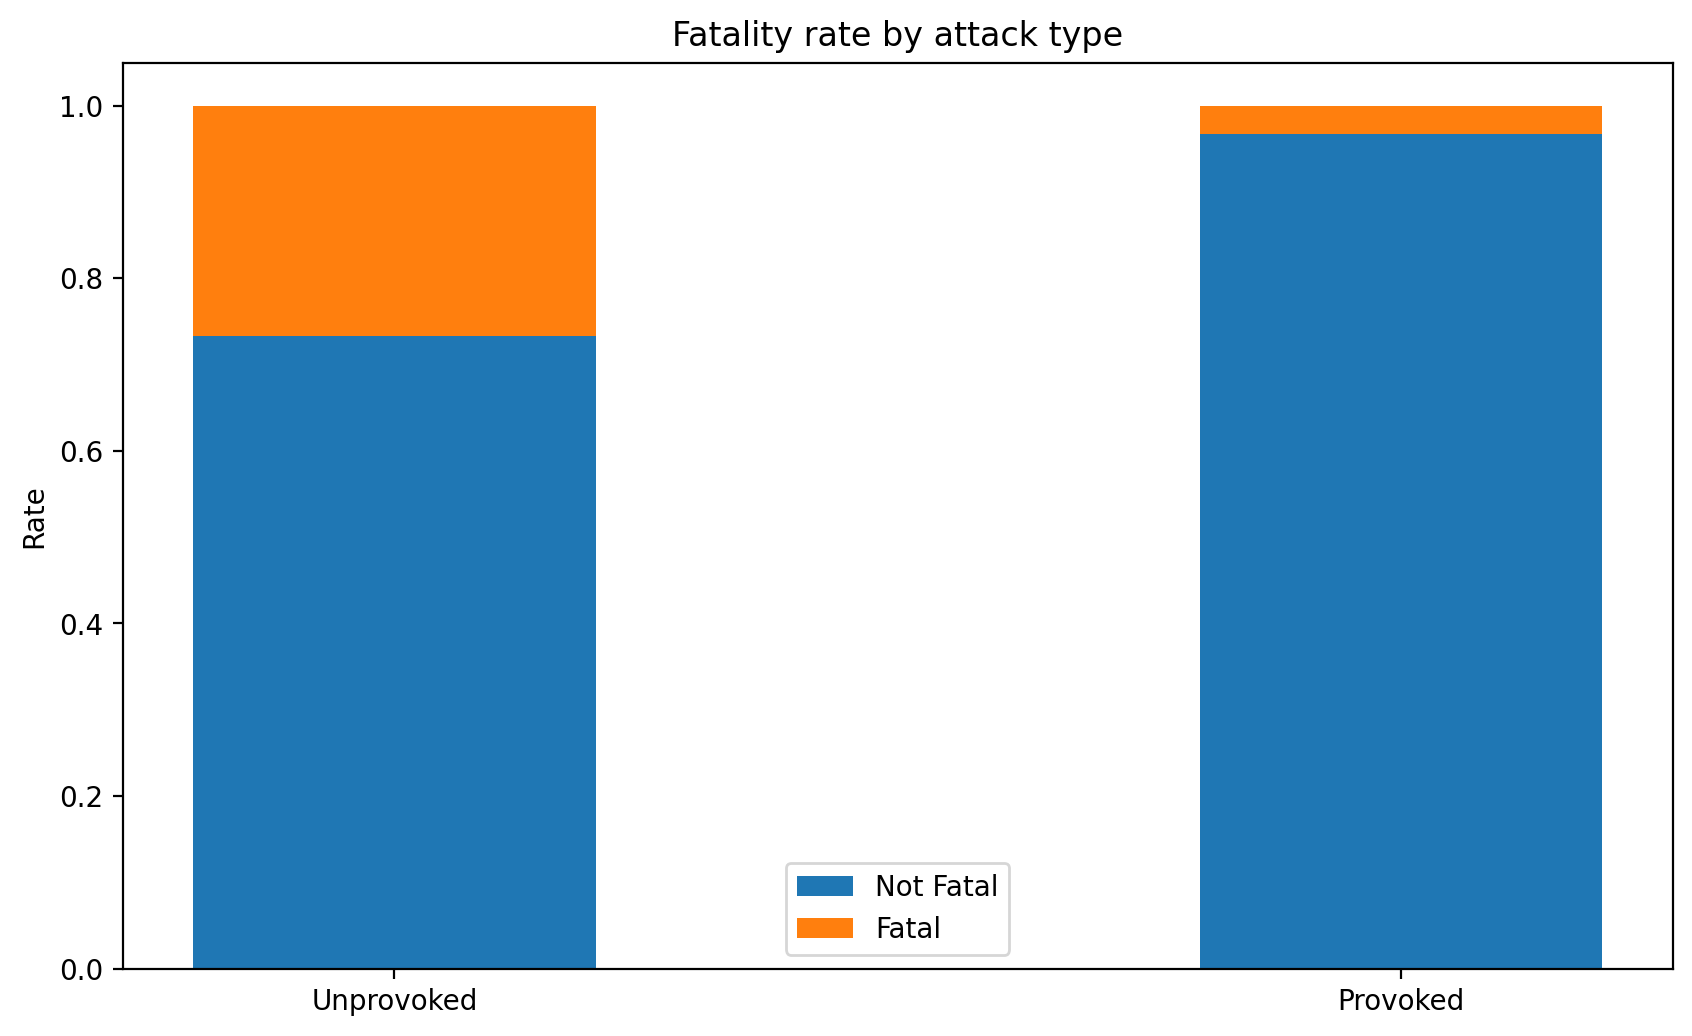

In [11]:
fatal = [unprov_fatal_perc, prov_fatal_perc]
non_fatal = [unprov_nonfatal_perc, prov_nonfatal_perc]
labels = ['Unprovoked', 'Provoked']
width = 0.4

fig, ax = plt.subplots(figsize=(10,6), dpi=200)

ax.bar(labels, non_fatal, width, label='Not Fatal')
ax.bar(labels, fatal, width, bottom=non_fatal, label='Fatal')

ax.set_ylabel('Rate')
ax.set_title('Fatality rate by attack type')
ax.legend()
pass

On the left column we have the data relative to unprovoked attacks. The blue portion represent the percentage of non-fatal attacks relative to the total of the unprovoked attacks, the orange part of the column represent the percentage for the unprovoked fatal attacks again relative to the total of the unprovoked attacks. The column on the left depicts the same statistics for the provoked attacks. 

We can conclude that only ~3.3% of provoked attacks seem to be fatal compared to ~26.7% of non provoked attacks leading to human death.
This results might be due to the fact that during provoked attacks a person is either in a vantage point in respect to the shark and or expecting a reaction from the animal, this would allow for better self protection. On the contrary an unprovoked and possibly unexpected attack would provide less opportunities for the victim to gain safety. 

<h3>Question 2: Is sex a factor in the type of injury suffered?</h3>



With this question i would like us to explore differences on the type of injuries suffered in the two sex categories. One finding in various studies (https://wol.iza.org/articles/gender-differences-in-risk-attitudes/long) is that women are more risk averse compared to men, this could lead us to think that men might be subject to more serious injuries.

For the purpose of this analisys we will only need to extract the 'Sex' and 'Injury' columns from the main data set. 

In [12]:
df_injury = data.loc[:,['Sex', 'Injury']]

The data obtained are then split, to separate data regarding males from data on females, nan values are dropped.

In [13]:
df_female = df_injury[df_injury['Sex'] == 'F'].dropna()
df_male = df_injury[df_injury['Sex'] == 'M'].dropna()

We will now count the frequencies of every injury type for both males and females.

In [14]:
df_fem_freq = count_each_value(df_female['Injury'])
df_fem_freq

{'Minor': 230, 'Moderate': 202, 'Major': 59, 'Fatal': 112, 'No injury': 1}

In [15]:
df_male_freq = count_each_value(df_male['Injury'])
df_male_freq 

{'Minor': 1897, 'Moderate': 1252, 'Fatal': 1238, 'Major': 370, 'No injury': 17}

As we could probably expect data in this format don't give us many insights, the next step will be, then, to create a plot to compare the result for females and males. Before we proceed we will divide each frequency by the lenght of the data to obtain the percentages for the relative frequency of each injury type. 

In [16]:
labels = sorted(df_male_freq)
fem_norm = [round((df_fem_freq[i] / len(df_female)), 3) for i in labels]
male_norm = [round((df_male_freq[i] / len(df_male)), 3) for i in labels]
width = 0.35
x = np.arange(len(labels))

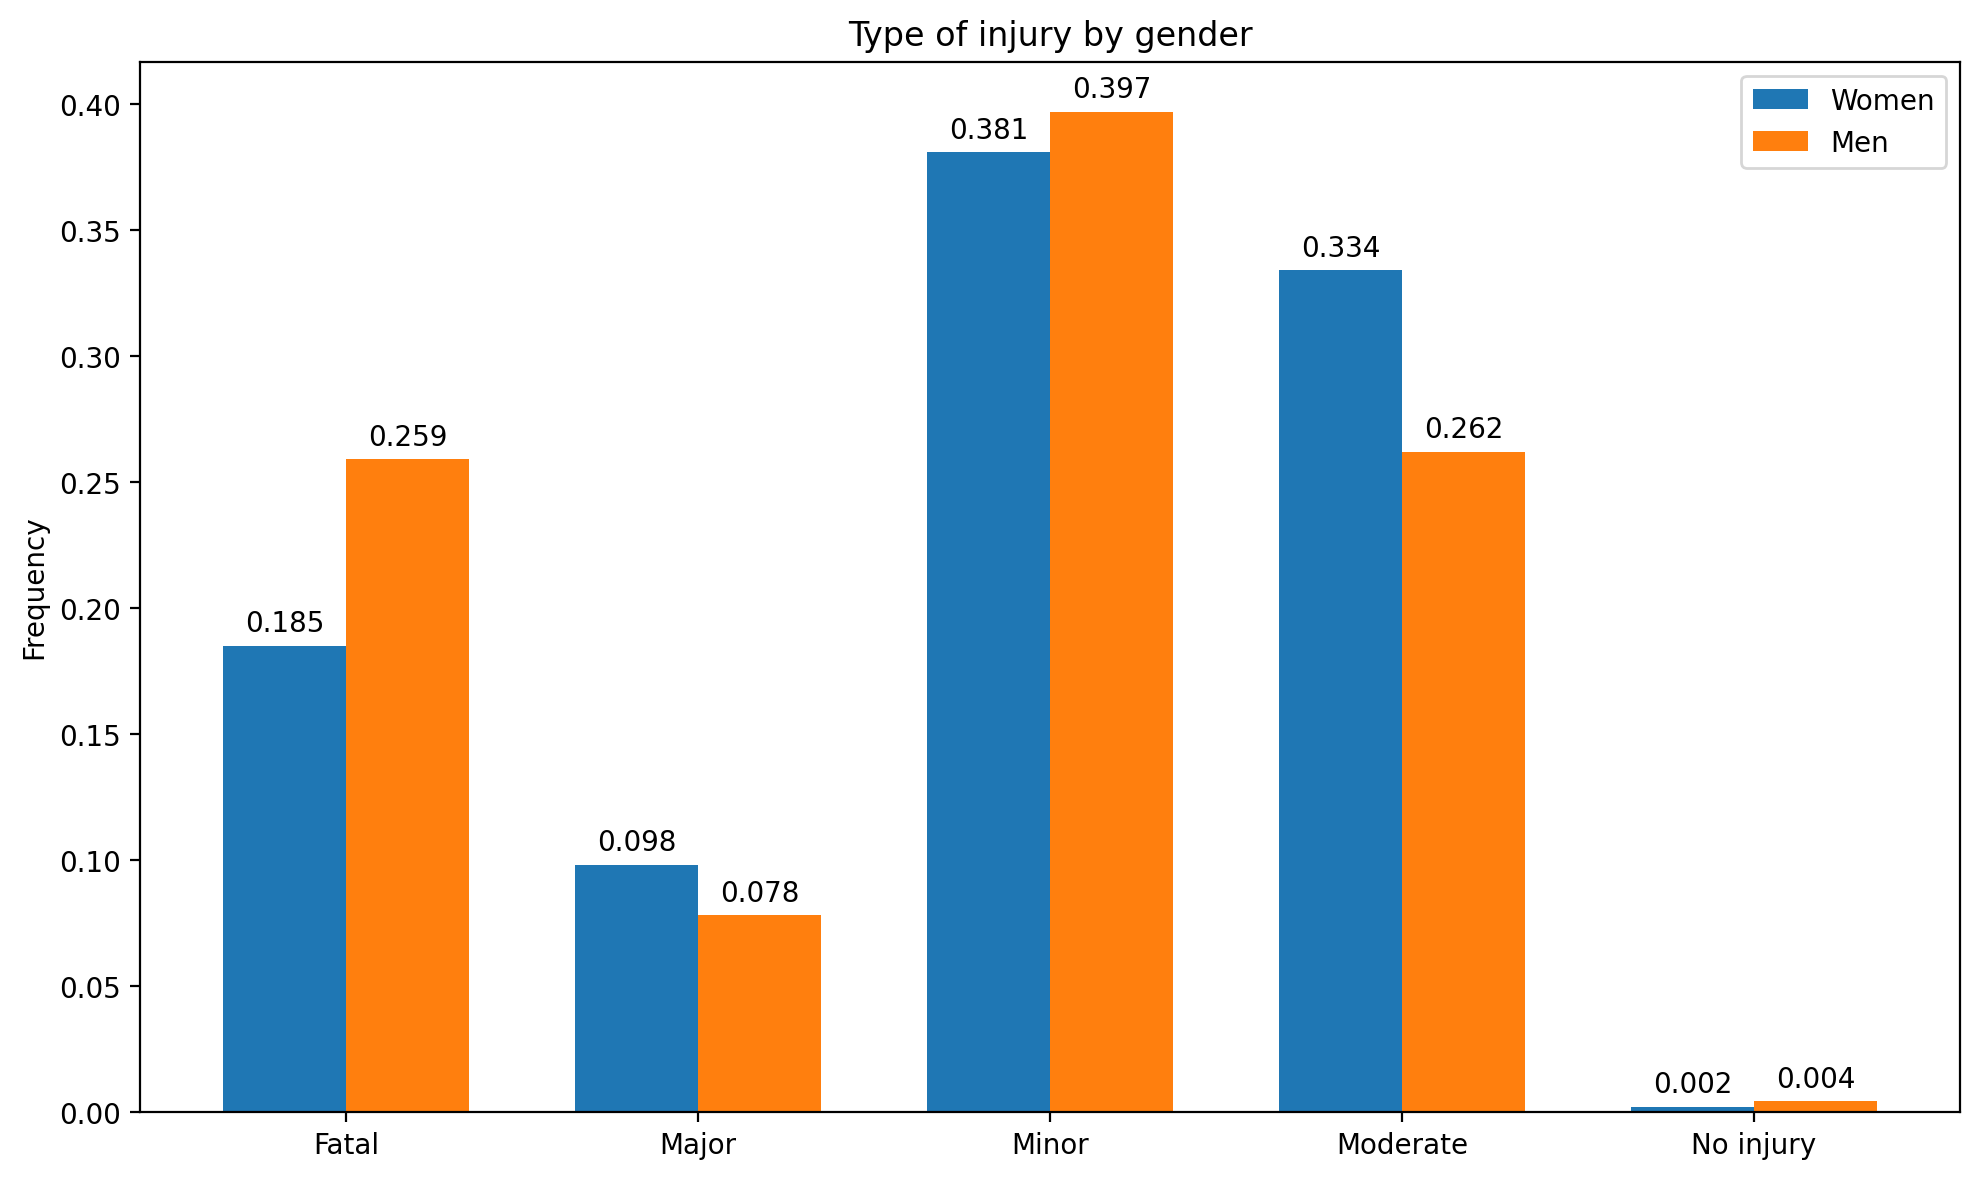

In [17]:
fig, ax = plt.subplots(figsize=(10,6), dpi=200)
fem_bars = ax.bar(x - width/2, fem_norm, width, label='Women')
male_bars = ax.bar(x + width/2, male_norm, width, label='Men')

ax.set_ylabel('Frequency')
ax.set_title('Type of injury by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(fem_bars, padding=3)
ax.bar_label(male_bars, padding=3)

fig.tight_layout()

plt.show()

The plot does not expose big differences between the distrubutions of injury types in males and females groups, but small variations appear in the "Fatal" and "Moderate" categories. Attacks on men seem more likely to lead to human death (25.9%) than the ones on women (18.5%), on the contrary attacks on women tends to be more moderate in nature (men 26.2% women 33.4%). I would then respond to our question that no big difference in the type of injury is measurable between attacks on women compared to attacks on men even though attack on male humans appears to be deadly more often than attacks on females. On the contrary attacks on women tend to cause moderate injuries more often compared to attacks on men. This might be in line with the results in research on risk aversion on men and women. Being more averse to risk would put a person in less dangerous situations, producing less fatal incidents and more moderate incidents. 

I would then respond to our question that no big difference in the type of injury is measurable between attacks on women compared to attacks on men even though attack on male humans appears to be deadly more often than attacks on females. On the contrary attacks on women tend to cause moderate injuries more often compared to attacks on men.

<h3>Question 3: What are the fatality rates for the top 10 recorded activities?</h3>

The aim of this last exploration is to investigate which activities, of the 10 most recorded in our dataset, are more likely to lead to human death in case of shark attack. "Generally, shark bites are exploratory, and the animal will swim away after one bite...Nonetheless, a single bite can grievously injure a human..." (https://en.wikipedia.org/wiki/Shark_attack#Reasons_for_attacks). 

We will first find the 10 most recorded activities. The following code will give us the descending ordered count of each activity.

In [18]:
counts = count_each_value(data.Activity.dropna())
counts = {k:v for (k,v) in sorted(counts.items(), reverse=True, key=lambda item: item[1])}

From this dictionary we will select the top 10 activities excluding activities with less than 70 records.

In [19]:
top10_activities = {k:v for (k,v) in counts.items() if v > 70}
top10_activities

{'Surfing': 971,
 'Swimming': 868,
 'Fishing': 431,
 'Spearfishing': 332,
 'Bathing': 162,
 'Wading': 149,
 'Diving': 127,
 'Standing': 99,
 'Snorkeling': 89,
 'Scuba diving': 76}

We will now select from the main data set only the rows with the activities we are intrested in and we will exclude the data where the incidents are not fatal.

In [20]:
top10_labels = list(top10_activities.keys())

df_activity_raw = data[data['Activity'].isin(top10_labels)]
df_activity = df_activity_raw[df_activity_raw['Fatal'] == 'Y']

Next we will count the entries for each activity in this new dataset.

In [21]:
fatal_activity = count_each_value(df_activity['Activity'])
fatal_activity

{'Swimming': 303,
 'Scuba diving': 13,
 'Snorkeling': 11,
 'Surfing': 49,
 'Diving': 19,
 'Spearfishing': 41,
 'Fishing': 47,
 'Standing': 16,
 'Bathing': 70,
 'Wading': 13}

Now we can normalize the data dividing the number of fatal attacks by the total number of attacks for each of the selected activities, obtaining the rate of death.

In [22]:
activities_perc = {k:round(v/top10_activities[k],3) for (k,v) in fatal_activity.items()}
activities_perc

{'Swimming': 0.349,
 'Scuba diving': 0.171,
 'Snorkeling': 0.124,
 'Surfing': 0.05,
 'Diving': 0.15,
 'Spearfishing': 0.123,
 'Fishing': 0.109,
 'Standing': 0.162,
 'Bathing': 0.432,
 'Wading': 0.087}

For this analisys a pie chart has been selected has it provides a clear view of the death rate for each activity compared to the others. It's worth noting that the percentages in the chart are different from the real ones computed for each activity, this is because the ones plotted are computed by the 'autopct' parameter which returns the slice of the sum of all percentages that particular activity occupies. Lastly we plot a pie chart with the percentage of fatal incidents for each activity.

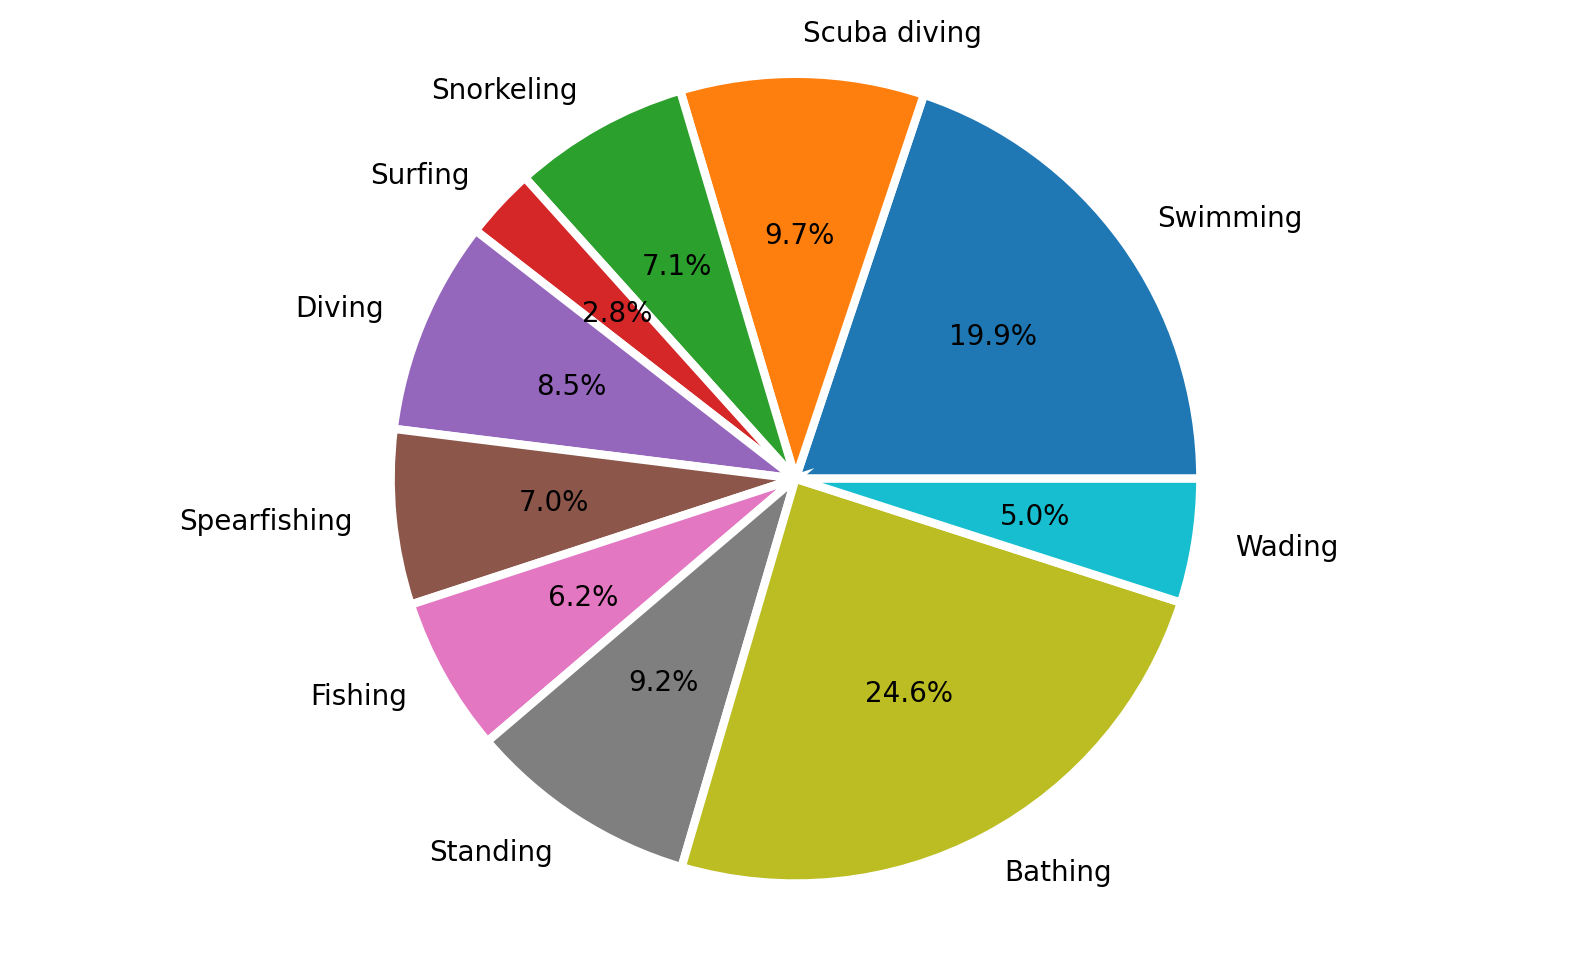

In [23]:
labels = list(activities_perc.keys())
sizes = list(activities_perc.values())

fig1, ax1 = plt.subplots(figsize=(10,6), dpi=200)
ax1.pie(sizes, labels=labels, autopct='%.1f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax1.axis('equal') 

plt.show()

It seems that some surface activities (swimming, bathing) have a higher death rate compared to underwater activities (snorkeling, spearfishing, scuba diving, spearfishing). This might be due to the fact that from the surface it is harder to see a shark and the victims might not be aware its presence, with the consequence of not being able to defend themself and take shelter. Nontheless some surface activities such as surfing and fishing have a lower death rate, this might be explained by the fact that such activities are normally performed with tools such as boats or surfing boards and this objects might provide an extra layer of protection against the attack.

To summarise, in questions number 1 and question number 3, we have seen that unprovoked attacks and gearless surface activities result in higher death rates. This brought us to the proposal that surprise and unawareness of the risk could be important factors in determinining the death rate in sharks attacks. In question number 2, we have noticed a small difference in injury severity between women and men, and we proposed that the disposition to risk difference between the two categories is a possible explanation for this diversity. This are of course only hypothesys and will require further analysys to be confirmed.